In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import folium

In [60]:
df = pd.read_csv('/data/notebook_files/HurricaneData.csv')
df.head(3)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            239 non-null    object 
 1   Name          239 non-null    object 
 2   Damage        239 non-null    int64  
 3   Area          239 non-null    float64
 4   Date          239 non-null    object 
 5   Year          239 non-null    int64  
 6   Decade        239 non-null    int64  
 7   WindSpeed     239 non-null    int64  
 8   Pressure      239 non-null    int64  
 9   State         239 non-null    object 
 10  WealthPerCap  239 non-null    float64
 11  Population    239 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 22.5+ KB


,Damage,Area,Year,Decade,WindSpeed,Pressure,WealthPerCap,Population
count,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02
mean,1.162537e+09,317.357741,1967.979079,1963.096234,81.046025,972.142259,49537.564249,7.479078e+05
std,4.682352e+09,595.823363,30.005524,30.063573,24.840203,21.231731,55174.082035,1.769635e+06
min,1.000000e+05,0.000000,1900.000000,1900.000000,30.000000,899.000000,886.652943,4.556000e+03
25%,3.025500e+06,10.550000,1946.000000,1940.000000,60.000000,955.000000,4943.100241,1.609920e+05
50%,2.500000e+07,62.700000,1969.000000,1960.000000,80.000000,974.000000,15151.231160,3.098550e+05
75%,2.000000e+08,303.350000,1995.000000,1990.000000,100.000000,989.000000,88186.264950,6.574090e+05
max,5.000000e+10,3931.400000,2017.000000,2010.000000,160.000000,1010.000000,194207.321000,1.615290e+07


The dataset is very clean. It contains 240 records of hurricanes during 1900-2017 in the US.

The hurrican that did the most damage in history is Erma in 2017. It causes 50 billion in loss.

In [61]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
abbrev_to_us_state

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'DC': 'District of Columbia

In [62]:
#df.assign(State_Full=[abbrev_to_us_state.get(tuple(row), 0) for row in df.State])
df['State_Full'] = df['State'].map(abbrev_to_us_state)
df['State_Full']

In [63]:

# initialize the map and store it in a m object
us_map = folium.Map(location=[40, -96], zoom_start=4,tiles='openstreetmap')
state_geo = 'state_geo.json'

custom_scale = (df['Damage'].quantile((0,0.2,0.4,0.6,0.8,1))).tolist()

folium.Choropleth(
    
      # geographical locations
    geo_data = state_geo,                     
    name = "choropleth",
    data = df,                        
    columns = ["State_Full", "Damage"],     
    key_on = "feature.properties.name",
    # YlGn refers to yellow and green
    threshold_scale=custom_scale, #use the custom scale we created for legend
    fill_color='YlOrRd',
    nan_fill_color="White", #Use white color if there is no data available for the county
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Heatmap of Hurricane Damage by State', #title of the legend
    highlight=True,
    line_color='black'
).add_to(us_map)                                 
  
us_map

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_7cbb1caa99d577fd6bd378e6f0724b2a {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
 <script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min.js"></script>
</head>
<body> 
 
 <div class="folium-map" id="map_7cbb1caa99d577fd6bd378e6f0724b2a" ></div>
 
</body>
<script> 
 
 var map_7cbb1caa99d577fd6bd378e6f0724b2a = L.map(
 "map_7cbb1caa99d577fd6bd378e6f0724b2a",
 {
 center: [40.0, -96.0],
 crs: L.CRS.EPSG3857,
 zoom: 4,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_1be3a44072586ff100dce332f14b9707 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_7cbb1caa99d577fd6bd378e6f0724b2a);
 
 
 var choropleth_ab5a2acb998f5af460db0f329d6dfcb8 = L.featureGroup(
 {}
 ).addTo(map_7cbb1caa99d577fd6bd378e6f0724b2a);
 
 
 function geo_json_fc2b355c3e745ab6d33af85adec4c192_styler(feature) {
 switch(feature.id) {
 case "AL": case "FL": case "LA": case "NY": case "RI": case "SC": 
 return {"color": "black", "fillColor": "#bd0026", "fillOpacity": 0.7, "opacity": 0.2, "weight": 1};
 case "GA": case "ME": case "MA": 
 return {"color": "black", "fillColor": "#ffffb2", "fillOpacity": 0.7, "opacity": 0.2, "weight": 1};
 case "MS": case "TX": 
 return {"color": "black", "fillColor": "#f03b20", "fillOpacity": 0.7, "opacity": 0.2, "weight": 1};
 case "NC": 
 return {"color": "black", "fillColor": "#fecc5c", "fillOpacity": 0.7, "opacity": 0.2, "weight": 1};
 default:
 return {"color": "black", "fillColor": "White", "fillOpacity": 0.7, "opacity": 0.2, "weight": 1};
 }
 }
 function geo_json_fc2b355c3e745ab6d33af85adec4c192_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.8999999999999999, "weight": 3};
 }
 }

 function geo_json_fc2b355c3e745ab6d33af85adec4c192_onEachFeature(feature, layer) {
 layer.on({
 mouseout: function(e) {
 if(typeof e.target.setStyle === "function"){
 geo_json_fc2b355c3e745ab6d33af85adec4c192.resetStyle(e.target);
 }
 },
 mouseover: function(e) {
 if(typeof e.target.setStyle === "function"){
 const highlightStyle = ge

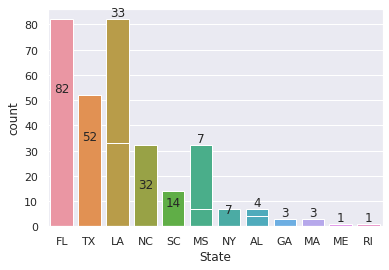

In [64]:

sns.set(style="darkgrid")
ax = sns.countplot(x='State', data=df)

ax = sns.countplot(x=df['State'],order=df['State'].value_counts(ascending=False).index)

abs_values = df['State'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

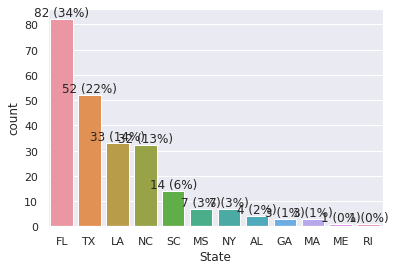

In [65]:
ax = sns.countplot(x=df['State'],
                   order=df['State'].value_counts(ascending=False).index);
        
abs_values = df['State'].value_counts(ascending=False)
rel_values = df['State'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

12 States have ever suffered from hurricanes in history. The state that was hit most is Florida, with 82 (34%) instances, followed by Texas with 52 instances and Lousiana with 33 instances.

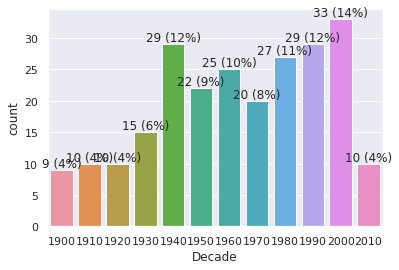

In [66]:
ax = sns.countplot(x=df['Decade'])
        
abs_values = df['Decade'].value_counts(sort=False)
rel_values = df['Decade'].value_counts(sort=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

It looks like there is an increasing trend of hurricane events over the years. However, the data for 2010-2020 is not complete. the arbitrary cut-off by every ten years also undermines the justification of this conclusion. 

Lets have a look at the occurance per year bar-chart.

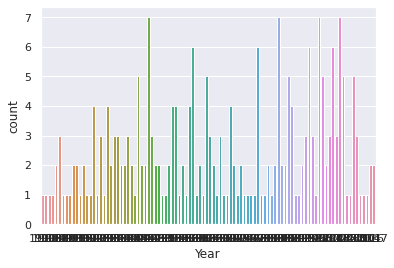

In [67]:
ax = sns.countplot(x=df['Year'])

It is indeed hard to tell that there is any trend on the frequency of hurricanes.

Now let's have a look at the damage.

In [68]:
df['Damage'].describe()

Average damage = 1162 million dollars

Min damage = 0.1 milion dollars

Max damage = 50000 million dollars

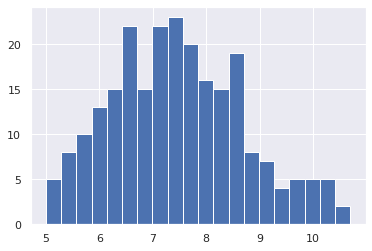

In [69]:

plt.hist(np.log10(df['Damage']), bins=20)
plt.show()

In [70]:
df[df.Damage == max(df.Damage)]

,ID,Name,Damage,Area,Date,Year,Decade,WindSpeed,Pressure,State,WealthPerCap,Population,State_Full
237,AL112017,Irma,50000000000,2315.2,9/10/17,2017,2010,100,937,FL,194207.321,1112044,Florida


The hurrican that did the most damage in history is Erma in 2017. It causes 50 billion in loss.

In [71]:
df.corr().round(3)

,Damage,Area,Year,Decade,WindSpeed,Pressure,WealthPerCap,Population
Damage,1.000,0.443,0.304,0.298,0.164,-0.240,0.419,0.068
Area,0.443,1.000,-0.089,-0.094,0.459,-0.530,0.030,-0.101
Year,0.304,-0.089,1.000,0.996,-0.339,0.329,0.872,0.133
Decade,0.298,-0.094,0.996,1.000,-0.344,0.334,0.867,0.130
WindSpeed,0.164,0.459,-0.339,-0.344,1.000,-0.925,-0.234,-0.085
Pressure,-0.240,-0.530,0.329,0.334,-0.925,1.000,0.183,0.056
WealthPerCap,0.419,0.030,0.872,0.867,-0.234,0.183,1.000,0.074
Population,0.068,-0.101,0.133,0.130,-0.085,0.056,0.074,1.000


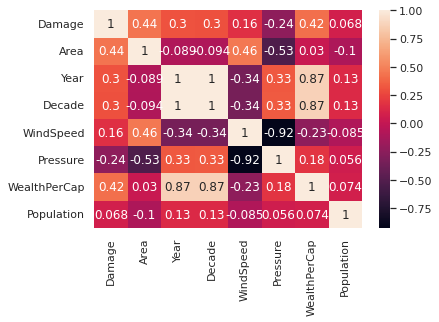

In [72]:
ax = sns.heatmap(df.corr(), annot=True)

The correlation matrix explains many things. 

First, it is not a surprise that there is a high correlation between year and decade, and between pressure and windspeed.

Second, the high correlaion between WealthPerCap and Year means that the year plays a big role on the WealthPerCap,The year also has an impact on the damage (correlation = 0.3). Both suggest that inflationc could be a factor that we want to consider when dealing with the dollar value of damage.

Third, the biggest factor to the damage is Area, followed by WealthPerCap. This makes perfect sense - the larger the area, and the higher the WealthPerCap of the area impacted, the more damage that the hurricane causes.

Last, Population is not quite relevant to any of the factors other than "year" and "decade" (weakly positively related).
Below scatter plots further visualizes these relationships.

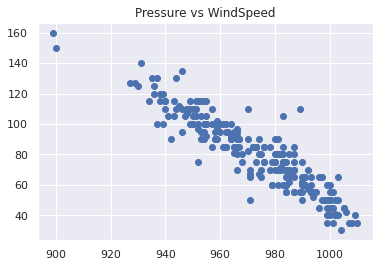

In [73]:
plt.scatter(df['Pressure'], df['WindSpeed'])
plt.title('Pressure vs WindSpeed')
plt.show()

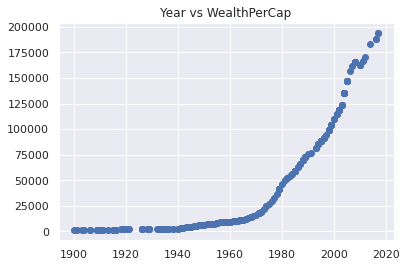

In [74]:
plt.scatter(df['Year'], df['WealthPerCap'])
plt.title('Year vs WealthPerCap')
plt.show()

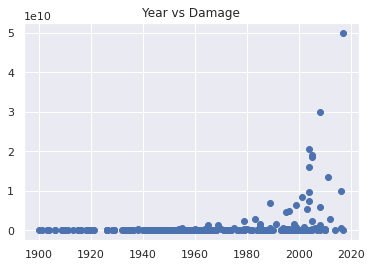

In [75]:
plt.scatter(df['Year'], df['Damage'])
plt.title('Year vs Damage')
plt.show()

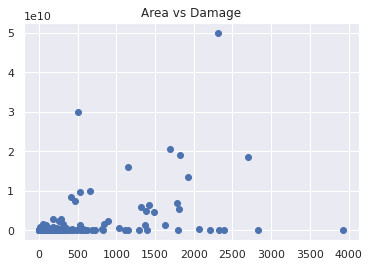

In [76]:
plt.scatter(df['Area'], df['Damage'])
plt.title('Area vs Damage')
plt.show()

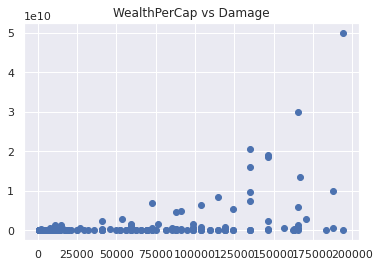

In [77]:
plt.scatter(df['WealthPerCap'], df['Damage'])
plt.title('WealthPerCap vs Damage')
plt.show()